# Importing library's

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the Data

In [ ]:
jnj_short_data = yf.download("JNJ", period="1mo", interval="2m")

[*********************100%***********************]  1 of 1 completed


In [ ]:
jnj_short_data.head()

Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Datetime,,,,,
2024-12-30 14:30:00+00:00,144.304993,144.880005,144.279999,144.839996,157140
2024-12-30 14:32:00+00:00,144.220001,144.660004,144.139999,144.384598,27935
2024-12-30 14:34:00+00:00,144.229996,144.367798,144.050003,144.130005,38228
2024-12-30 14:36:00+00:00,143.850006,144.345001,143.850006,144.274994,29391
2024-12-30 14:38:00+00:00,143.690002,143.929993,143.690002,143.899994,20030


In [ ]:
# rename the columns
new_column_names = ["Close", "High", "Low", "Open", "Volume"]
jnj_short_data.columns = new_column_names

In [ ]:
jnj_short_data.head()

,Close,High,Low,Open,Volume
Datetime,,,,,
2024-12-30 14:30:00+00:00,144.304993,144.880005,144.279999,144.839996,157140
2024-12-30 14:32:00+00:00,144.220001,144.660004,144.139999,144.384598,27935
2024-12-30 14:34:00+00:00,144.229996,144.367798,144.050003,144.130005,38228
2024-12-30 14:36:00+00:00,143.850006,144.345001,143.850006,144.274994,29391
2024-12-30 14:38:00+00:00,143.690002,143.929993,143.690002,143.899994,20030


In [ ]:
jnj_short_data.tail()

,Close,High,Low,Open,Volume
Datetime,,,,,
2025-01-28 20:50:00+00:00,150.949997,150.960007,150.610001,150.750000,70440
2025-01-28 20:52:00+00:00,151.070007,151.110001,150.919998,150.949997,110265
2025-01-28 20:54:00+00:00,150.835007,151.089996,150.835007,151.080002,119732
2025-01-28 20:56:00+00:00,150.664993,150.869995,150.660004,150.835007,143651
2025-01-28 20:58:00+00:00,150.389999,150.710007,150.380005,150.664993,425567


In [ ]:
# download the data
jnj_short_data.to_csv("jnj_short_data.csv")

# Loading the data

In [2]:
# Loading the data
jnj_short_data = pd.read_csv("jnj_short_data.csv")

In [3]:
jnj_short_data.head()

,Datetime,Close,High,Low,Open,Volume
0,2024-12-30 14:30:00+00:00,144.304993,144.880005,144.279999,144.839996,157140
1,2024-12-30 14:32:00+00:00,144.220001,144.660004,144.139999,144.384598,27935
2,2024-12-30 14:34:00+00:00,144.229996,144.367798,144.050003,144.130005,38228
3,2024-12-30 14:36:00+00:00,143.850006,144.345001,143.850006,144.274994,29391
4,2024-12-30 14:38:00+00:00,143.690002,143.929993,143.690002,143.899994,20030


In [4]:
jnj_short_data.shape

(3705, 6)

# Exploratory Analysis

## Univariate Analsis

In [5]:
jnj_short_data.describe()

,Close,High,Low,Open,Volume
count,3705.000000,3705.000000,3705.000000,3705.000000,3.705000e+03
mean,145.594978,145.668619,145.517539,145.592201,3.695636e+04
std,2.658174,2.658982,2.655270,2.657400,5.326525e+04
min,141.287506,141.639999,140.679993,141.000000,9.550000e+02
25%,143.580002,143.639999,143.500000,143.580002,1.774800e+04
50%,144.610001,144.664993,144.529999,144.595001,2.610700e+04
75%,147.039993,147.100006,146.968506,147.050003,3.939900e+04
max,153.429993,153.449997,153.339996,153.419998,1.670955e+06


In [6]:
jnj_short_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  3705 non-null   object 
 1   Close     3705 non-null   float64
 2   High      3705 non-null   float64
 3   Low       3705 non-null   float64
 4   Open      3705 non-null   float64
 5   Volume    3705 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 173.8+ KB


In [7]:
# change the datime datatype
jnj_short_data['Datetime'] = pd.to_datetime(jnj_short_data['Datetime'])

In [8]:
# skewness and kurtosis
print("Skewness:", jnj_short_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", jnj_short_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close      1.000292
High       1.010259
Low        0.988762
Open       1.001105
Volume    13.529061
dtype: float64
Kurtosis: Close       0.356867
High        0.373137
Low         0.339302
Open        0.360804
Volume    319.045562
dtype: float64


## Distribution Analysis

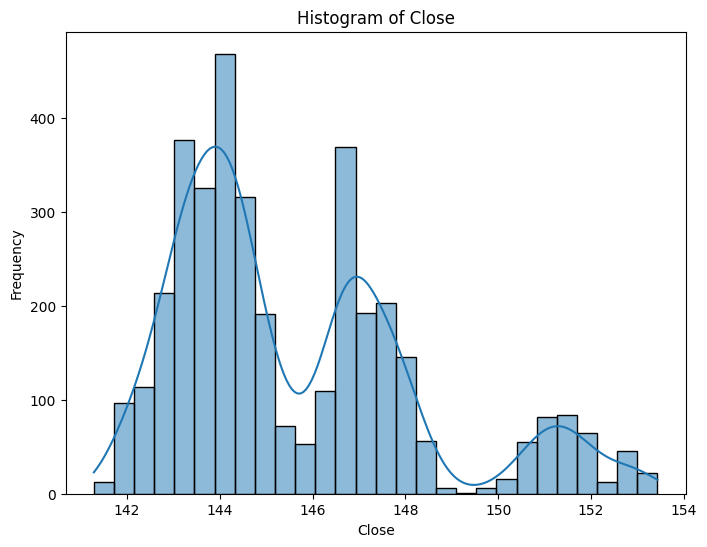

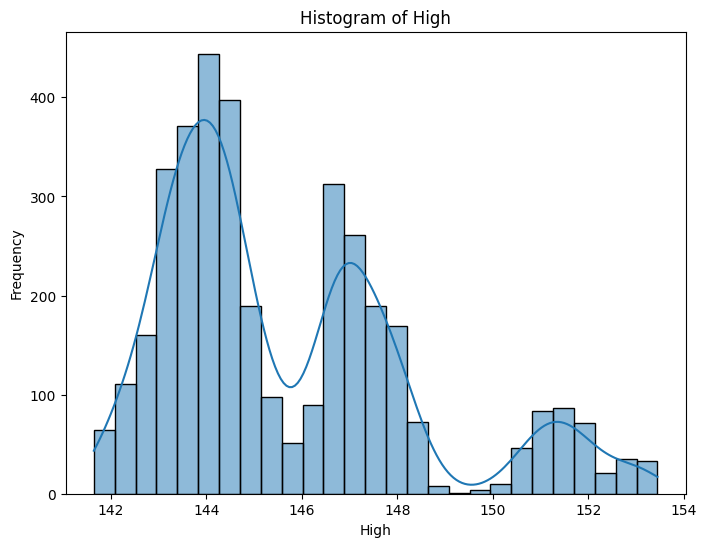

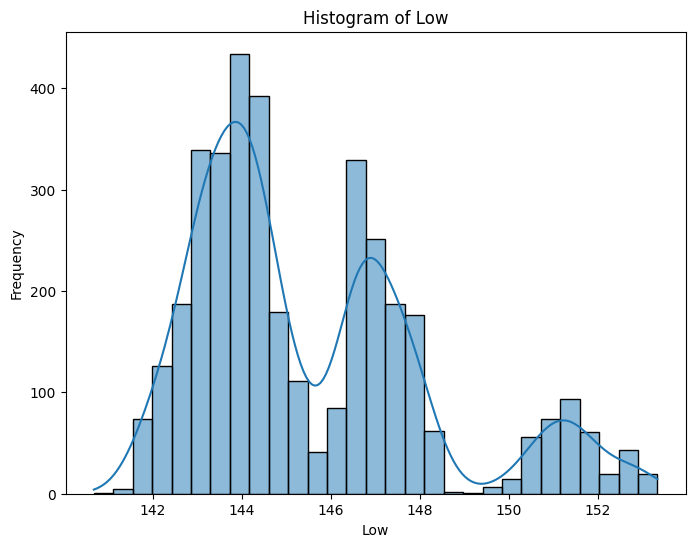

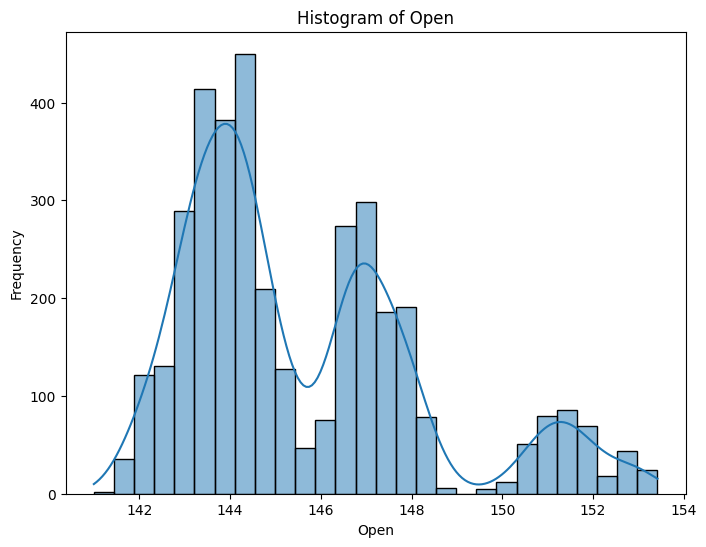

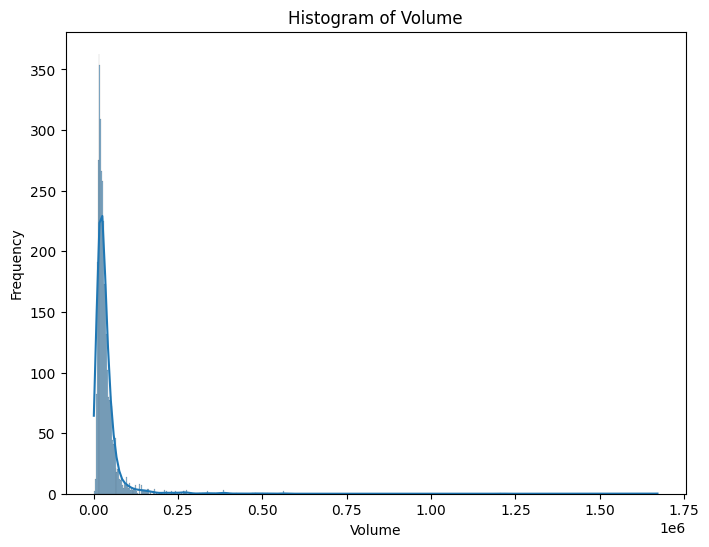

In [9]:
# Identify numerical columns
numerical_columns = jnj_short_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(jnj_short_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(jnj_short_data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

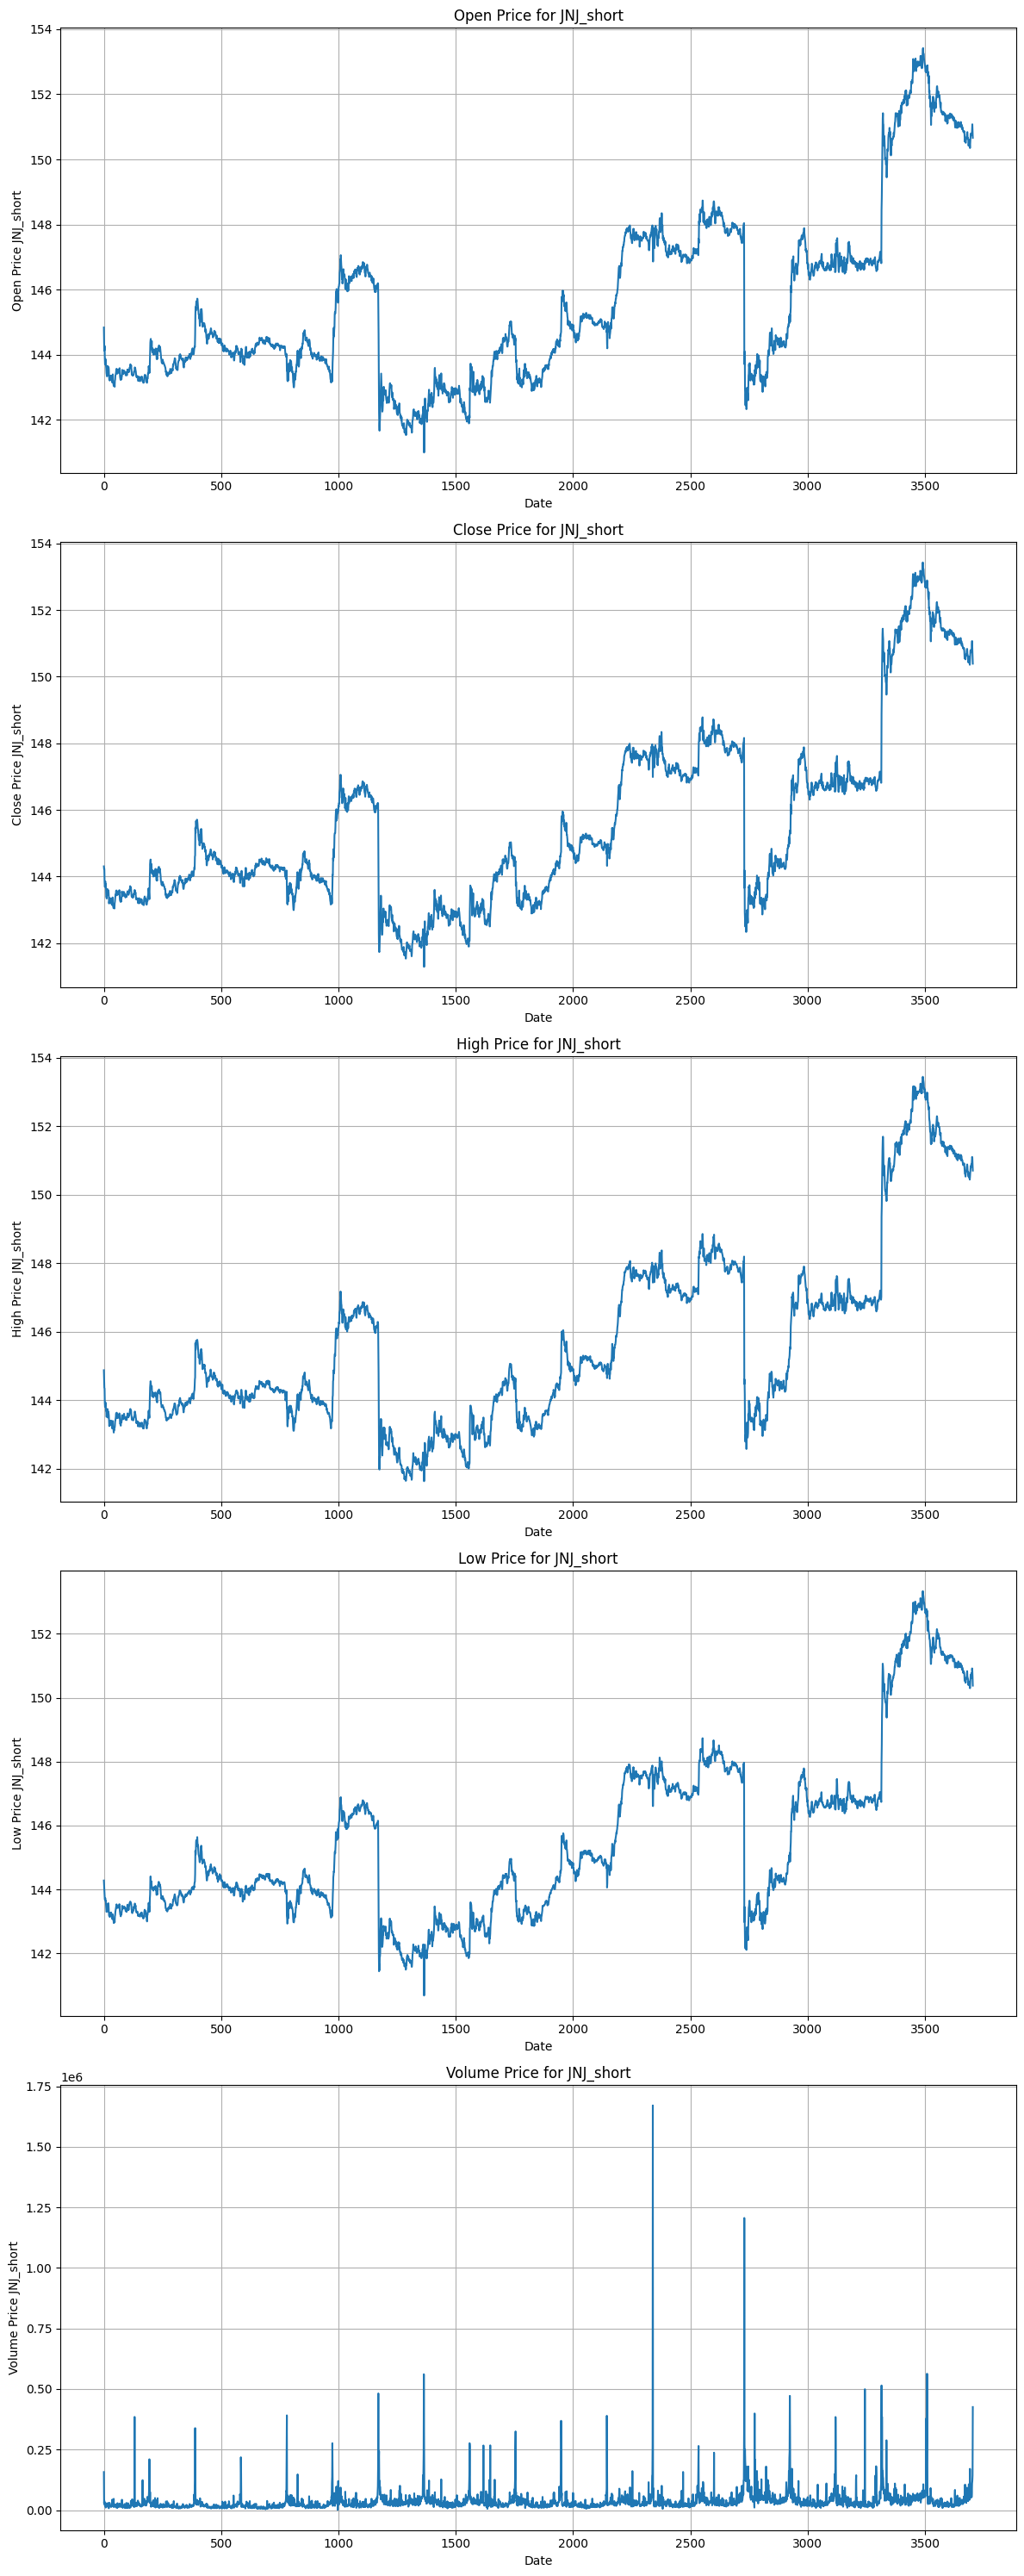

In [11]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(jnj_short_data.index, jnj_short_data[col])
    axes[i].set_title(f'{col} Price for JNJ_short')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price JNJ_short')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

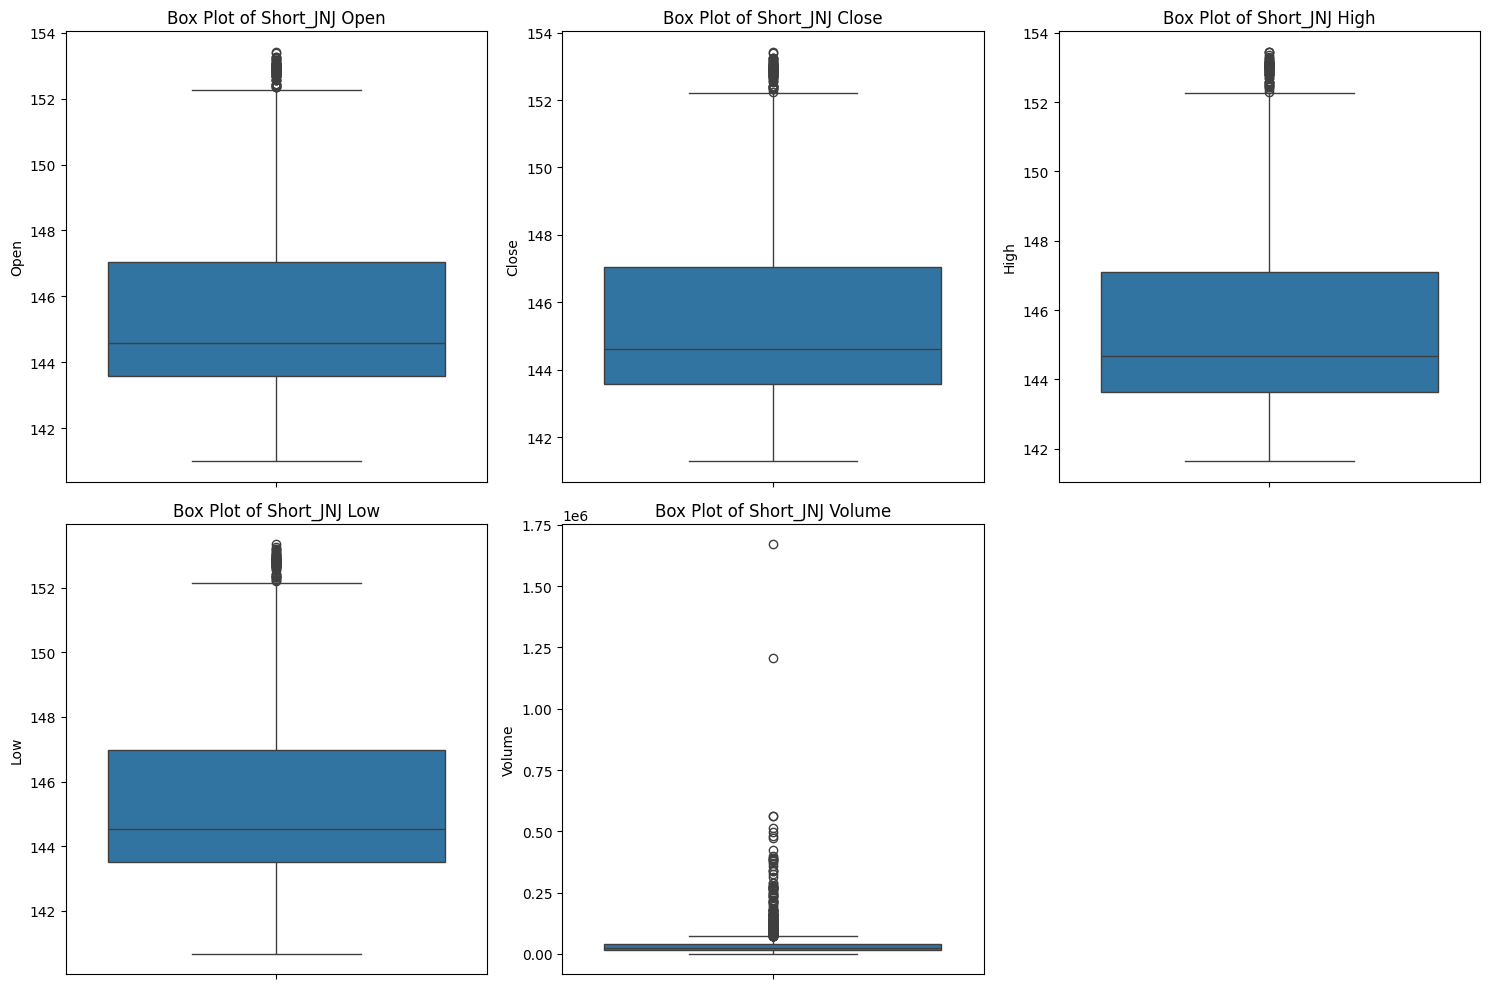

In [13]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=jnj_short_data[col])
    plt.title(f'Box Plot of Short_JNJ {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

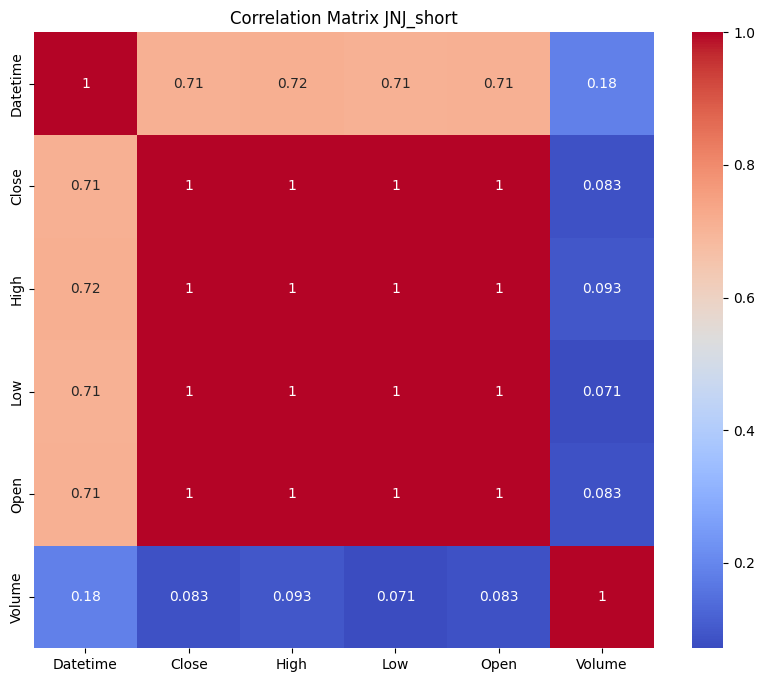

In [14]:
correlation_matrix = jnj_short_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix JNJ_short')
plt.show()

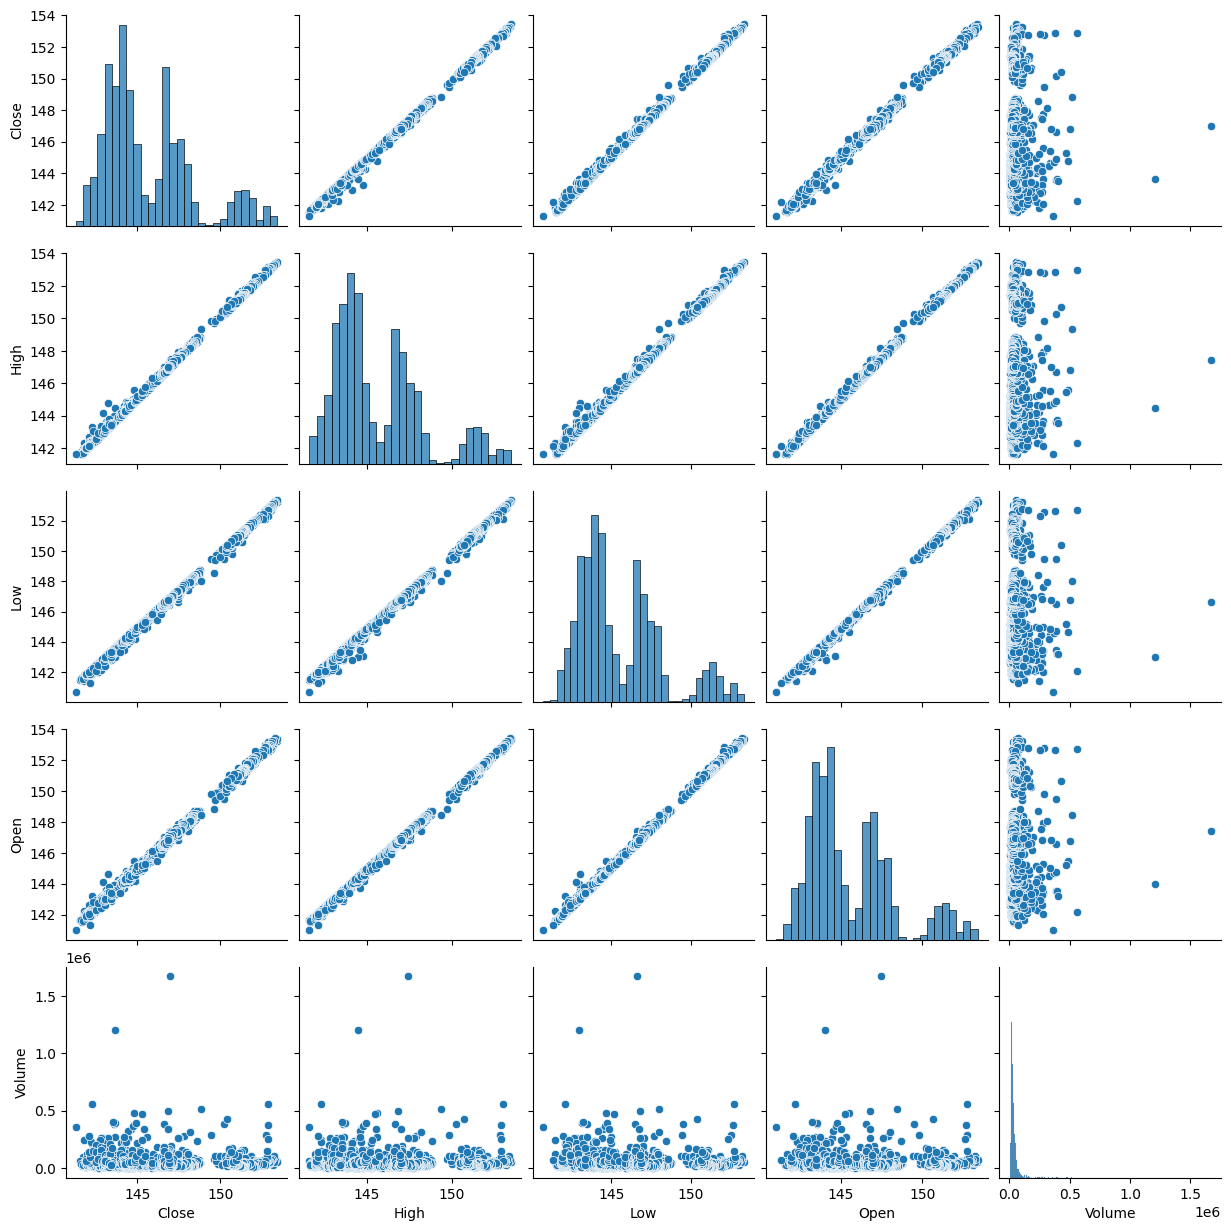

In [16]:
# pairs of numerical columns
sns.pairplot(jnj_short_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'Relationship between Close Price and Trading Volume of Short_JNJ')

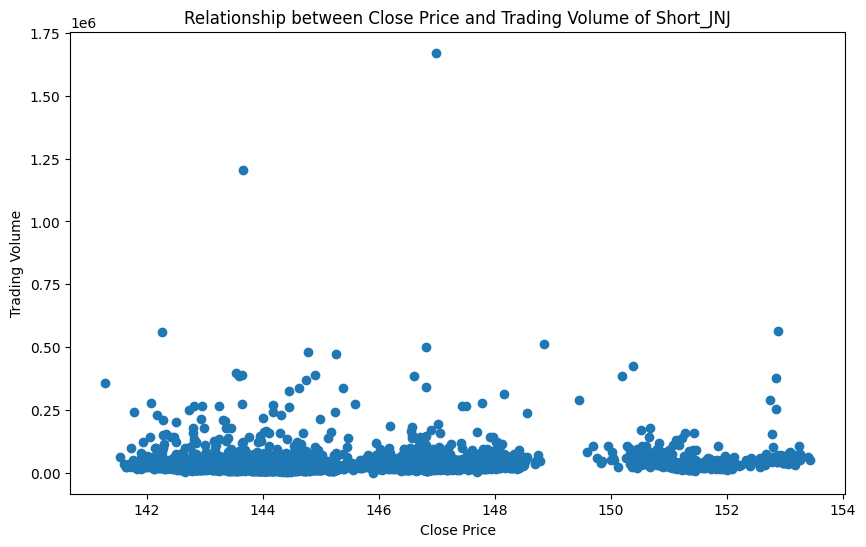

In [17]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(jnj_short_data['Close'], jnj_short_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('Relationship between Close Price and Trading Volume of Short_JNJ')

# Feature Engineering

In [18]:
# Moving Average (SMA) with a 5-day window
window_sma = 5
jnj_short_data['SMA'] = jnj_short_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 5-day window
jnj_short_data['StdDev'] = jnj_short_data['Close'].rolling(window=window_sma).std()
jnj_short_data['UpperBand'] = jnj_short_data['SMA'] + (2 * jnj_short_data['StdDev'])
jnj_short_data['LowerBand'] = jnj_short_data['SMA'] - (2 * jnj_short_data['StdDev'])

# RSI with a 7-day window
def calculate_rsi(data, window=7):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

jnj_short_data['RSI'] = calculate_rsi(jnj_short_data)

In [20]:
# Calculate moving averages
jnj_short_data['MA_5'] = jnj_short_data['Close'].rolling(window=5).mean()
jnj_short_data['MA_10'] = jnj_short_data['Close'].rolling(window=10).mean()

In [21]:
jnj_short_data.head()

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,MA_5,MA_10
0,2024-12-30 14:30:00+00:00,144.304993,144.880005,144.279999,144.839996,157140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-12-30 14:32:00+00:00,144.220001,144.660004,144.139999,144.384598,27935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-12-30 14:34:00+00:00,144.229996,144.367798,144.050003,144.130005,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-30 14:36:00+00:00,143.850006,144.345001,143.850006,144.274994,29391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-30 14:38:00+00:00,143.690002,143.929993,143.690002,143.899994,20030,144.059,0.271805,144.602609,143.51539,NaN,144.059,NaN


In [22]:
jnj_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,4
StdDev,4
UpperBand,4
LowerBand,4


In [23]:
# fill na with mean
jnj_short_data.fillna(jnj_short_data.mean(), inplace=True)

In [24]:
jnj_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


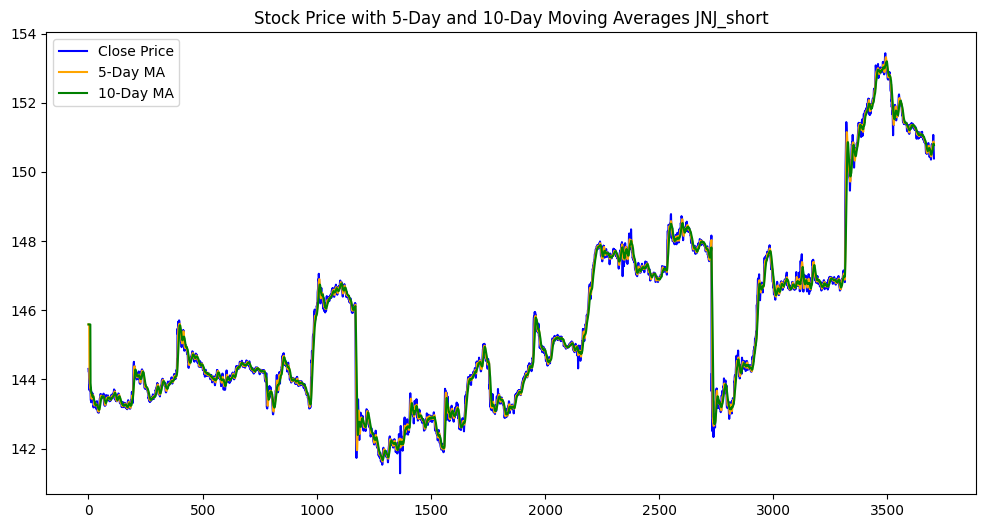

In [25]:
# plot the moving averages
plt.figure(figsize=(12, 6))
plt.plot(jnj_short_data['Close'], label='Close Price', color='blue')
plt.plot(jnj_short_data['MA_5'], label='5-Day MA', color='orange')
plt.plot(jnj_short_data['MA_10'], label='10-Day MA', color='green')
plt.title('Stock Price with 5-Day and 10-Day Moving Averages JNJ_short')
plt.legend()
plt.show()

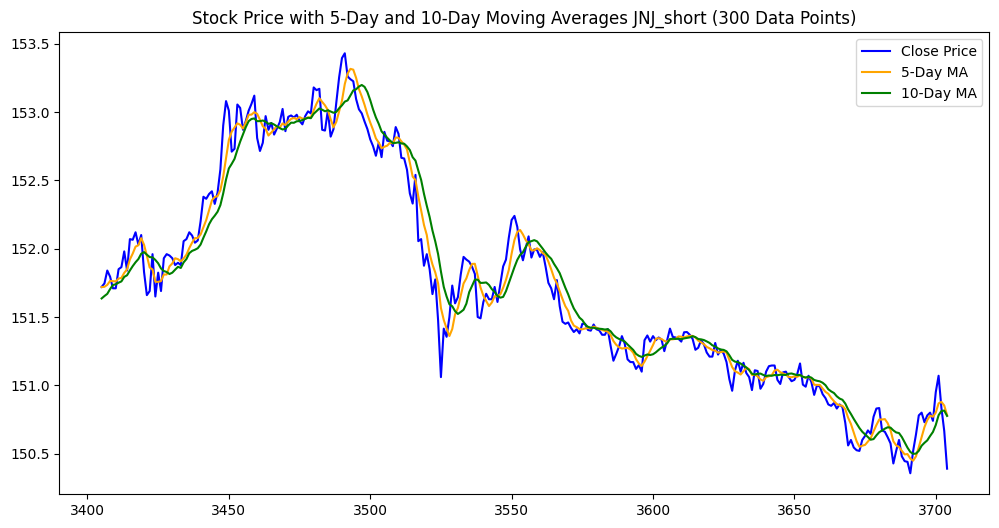

In [26]:
# plot the moving averages for 300 data points
plt.figure(figsize=(12, 6))
plt.plot(jnj_short_data['Close'][-300:], label='Close Price', color='blue')
plt.plot(jnj_short_data['MA_5'][-300:], label='5-Day MA', color='orange')
plt.plot(jnj_short_data['MA_10'][-300:], label='10-Day MA', color='green')
plt.title('Stock Price with 5-Day and 10-Day Moving Averages JNJ_short (300 Data Points)')
plt.legend()
plt.show()

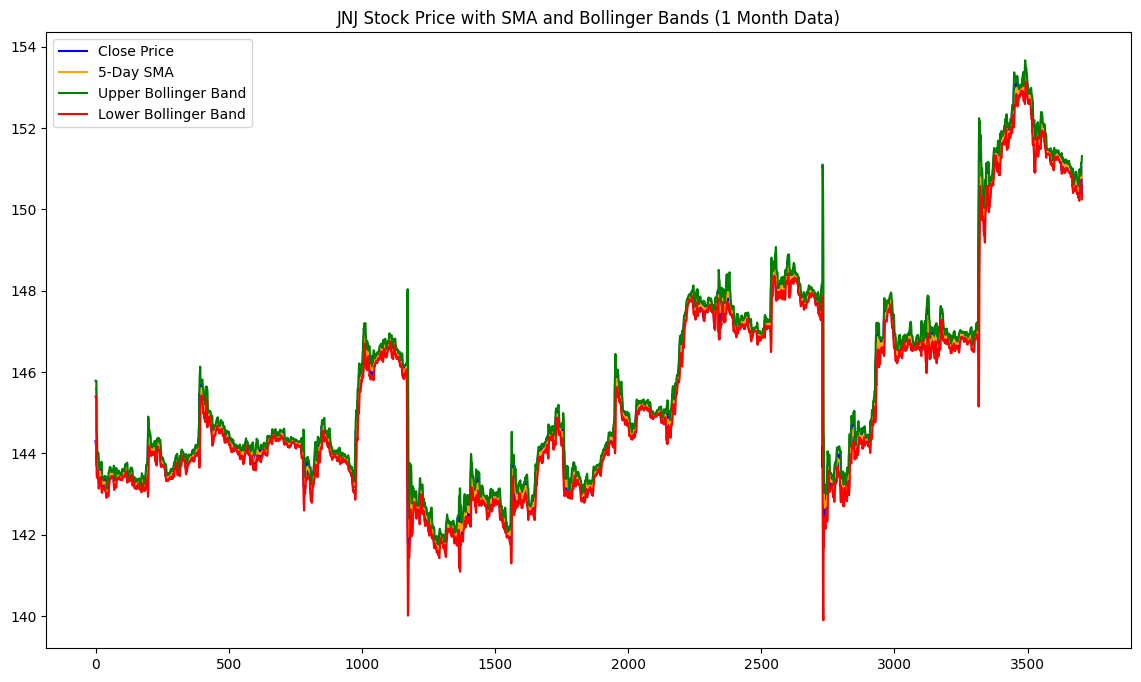

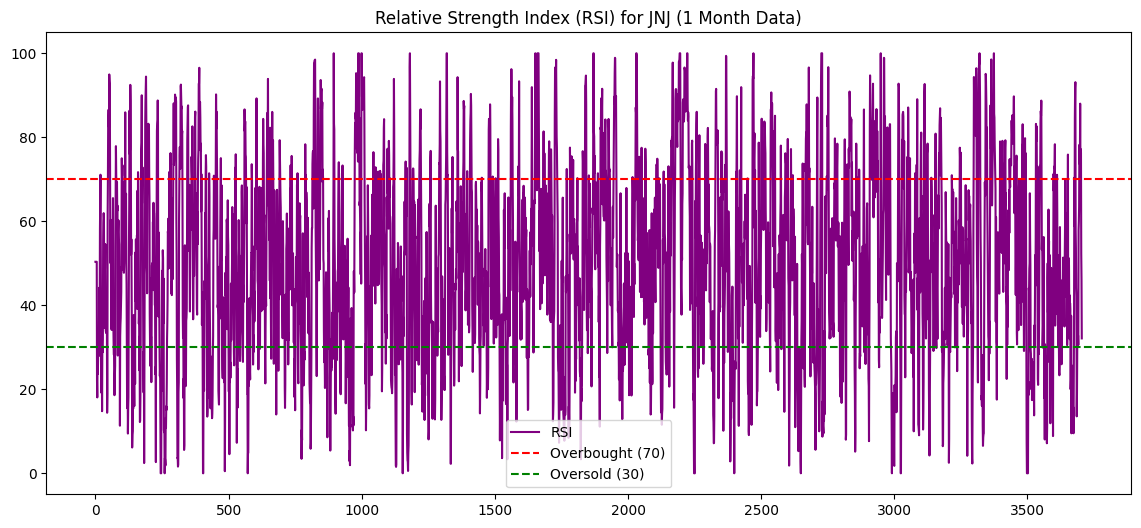

In [27]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(jnj_short_data['Close'], label='Close Price', color='blue')
plt.plot(jnj_short_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(jnj_short_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(jnj_short_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(jnj_short_data.index, jnj_short_data['UpperBand'], jnj_short_data['LowerBand'], color='gray', alpha=0.3)
plt.title('JNJ Stock Price with SMA and Bollinger Bands (1 Month Data)')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(jnj_short_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for JNJ (1 Month Data)')
plt.legend()
plt.show()

In [29]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.6 MB/s eta 0:00:00


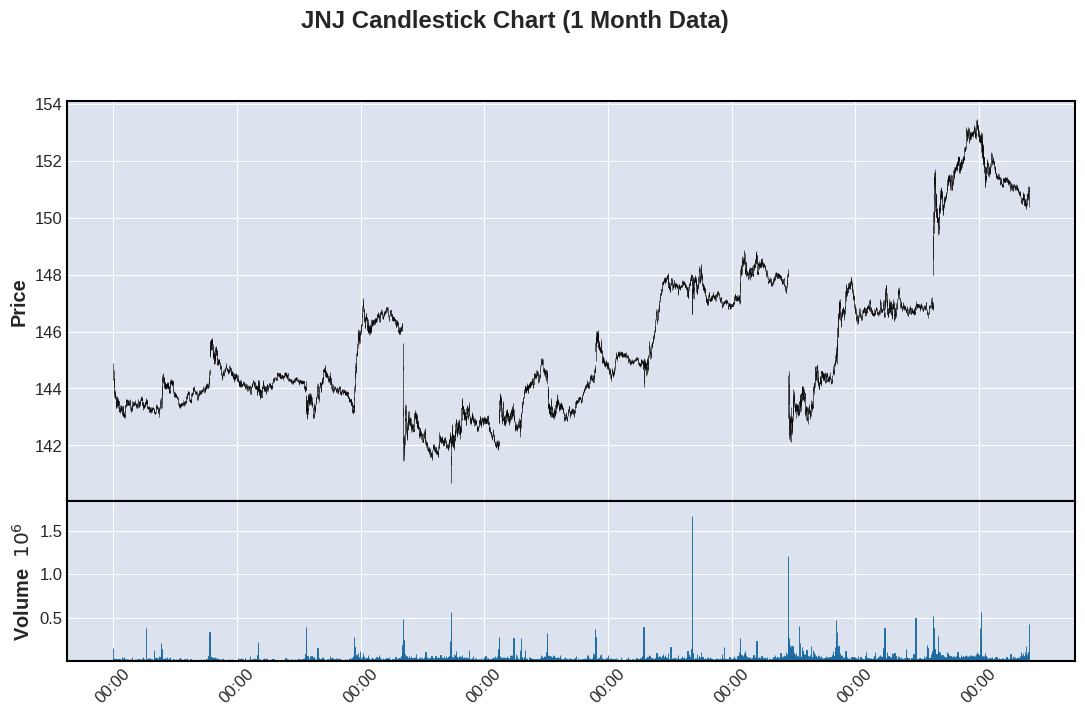

In [30]:
import mplfinance as mpf

# Ensure the index is a datetime object
jnj_short_data.index = pd.to_datetime(jnj_short_data.index)

# Plot candlestick chart
mpf.plot(jnj_short_data, type='candle', volume=True, figsize=(14, 8), title='JNJ Candlestick Chart (1 Month Data)')

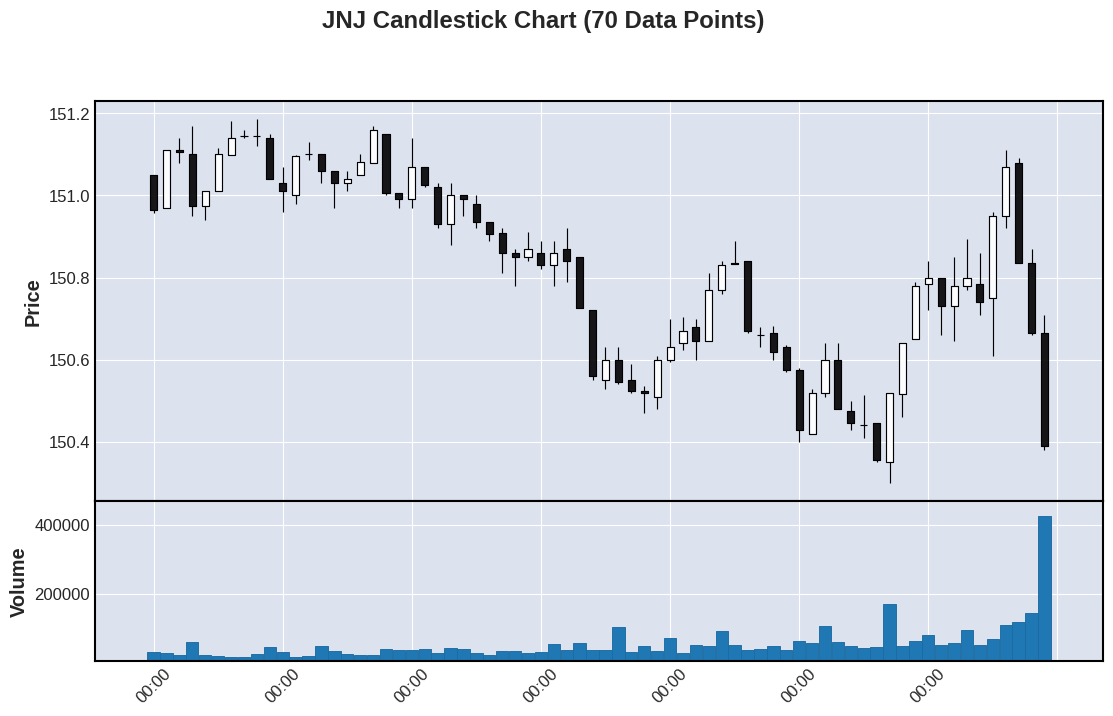

In [32]:
# plot candelstic for Close for 70 data points
mpf.plot(jnj_short_data.tail(70), type='candle', volume=True, figsize=(14, 8), title='JNJ Candlestick Chart (70 Data Points)')

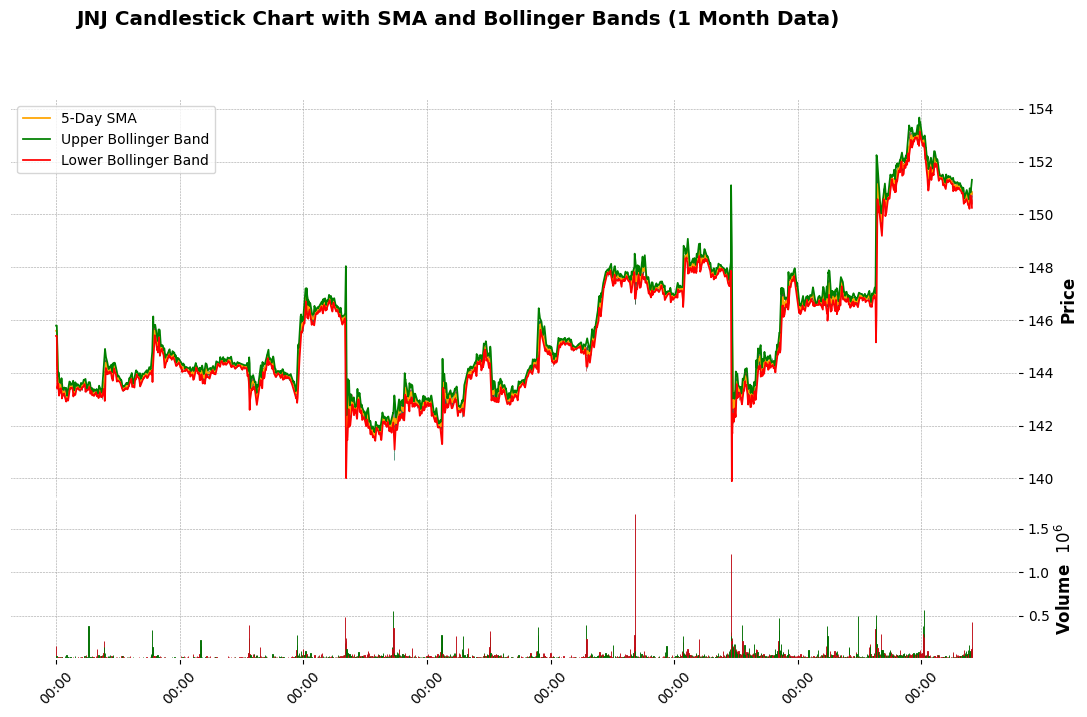

In [33]:
# plots for SMA and Bollinger Bands
ap = [
    mpf.make_addplot(jnj_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(jnj_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_short_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    jnj_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='JNJ Candlestick Chart with SMA and Bollinger Bands (1 Month Data)',
    style='charles'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

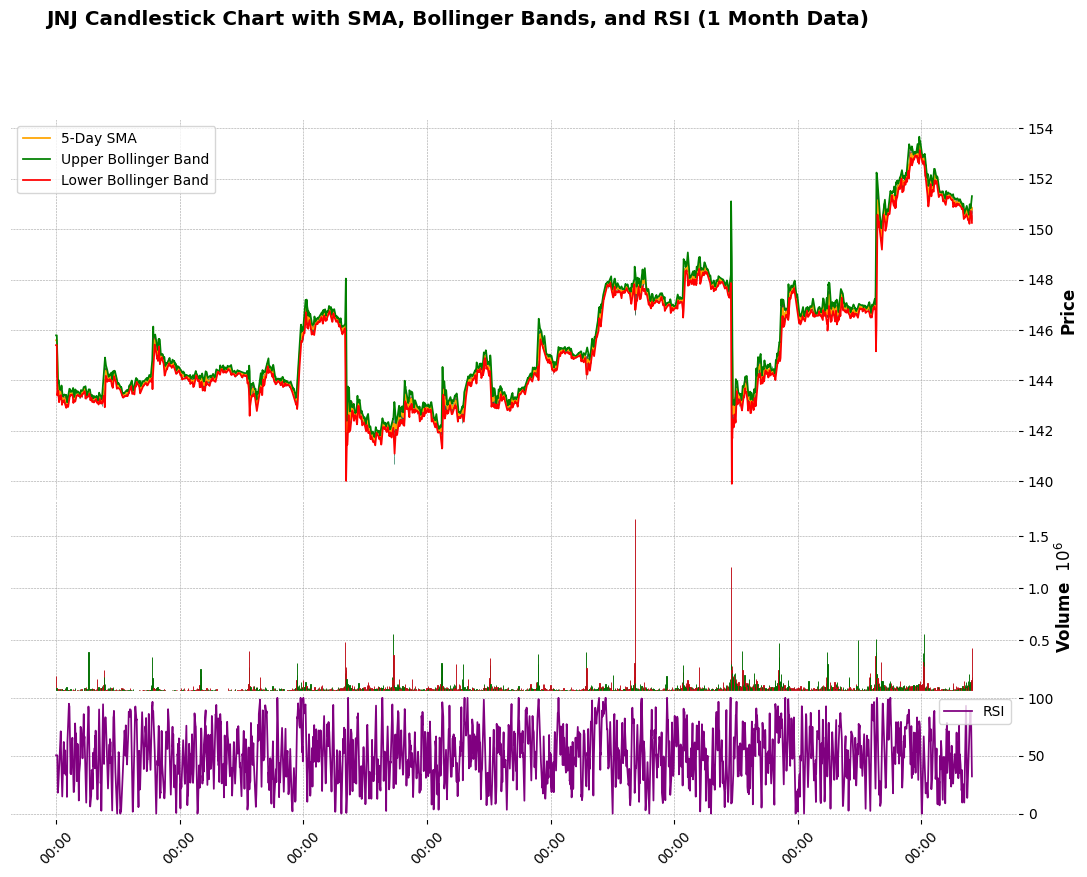

In [34]:
# Create additional plots for SMA, Bollinger Bands, and RSI
ap = [
    mpf.make_addplot(jnj_short_data['SMA'], color='orange', label='5-Day SMA'),
    mpf.make_addplot(jnj_short_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_short_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(jnj_short_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    jnj_short_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='JNJ Candlestick Chart with SMA, Bollinger Bands, and RSI (1 Month Data)',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)


## Time Series Decomposition

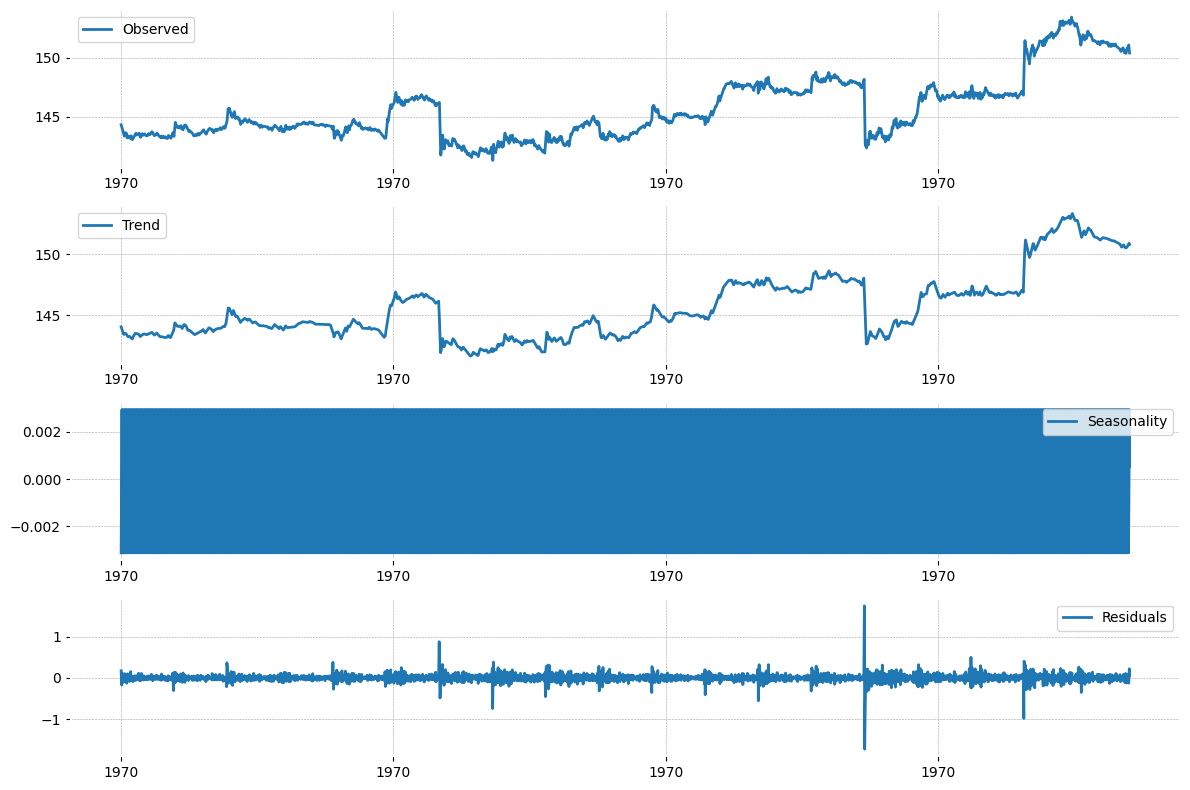

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(jnj_short_data['Close'], model='additive', period=5)  # Weekly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 0.10%


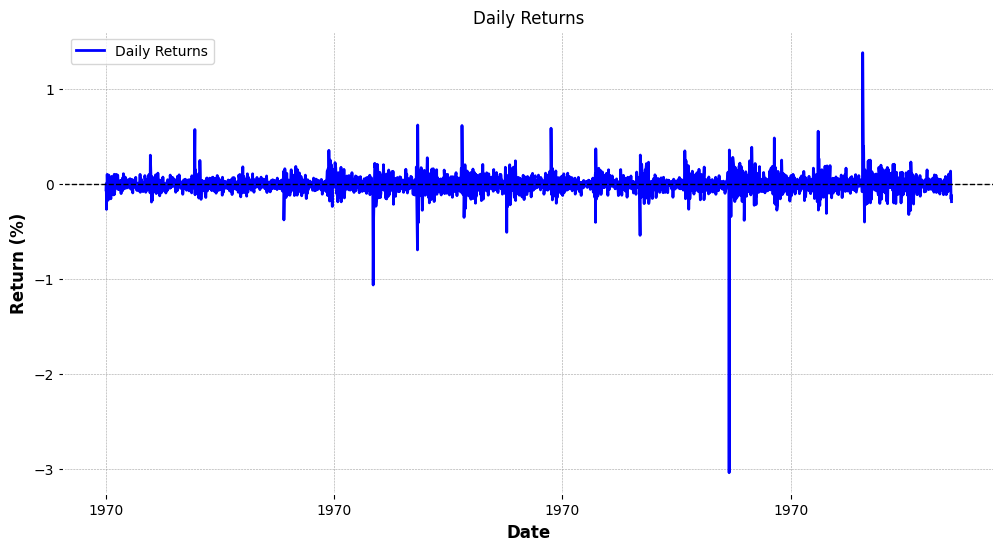

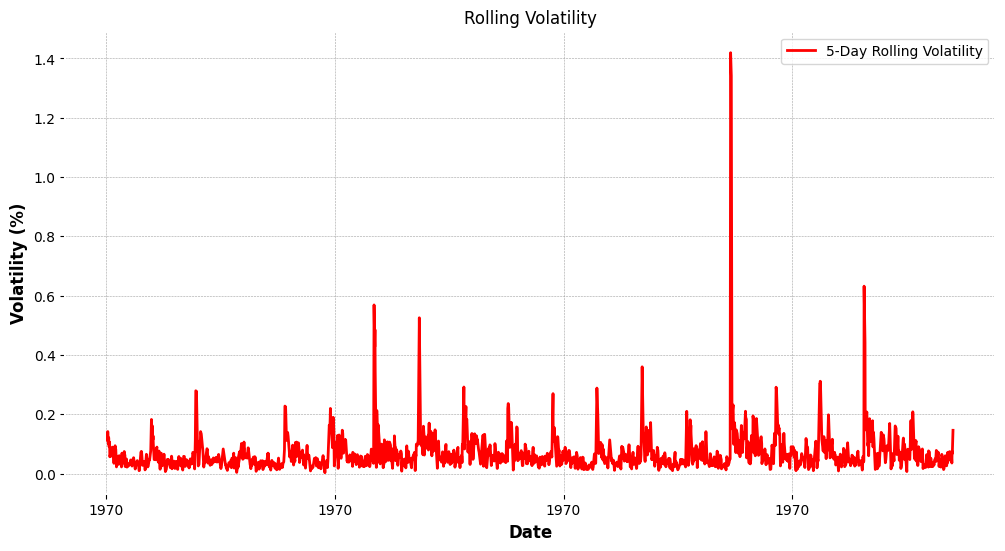

In [36]:
# Calculate daily returns
jnj_short_data['Daily_Return'] = jnj_short_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = jnj_short_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(jnj_short_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
jnj_short_data['Rolling_Volatility'] = jnj_short_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(jnj_short_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()


# Stationarity Test

In [37]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(jnj_short_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.2755893197769053
p-value: 0.6402649332356674
Critical Values:
   1%: -3.4321248463781306
   5%: -2.862324228723766
   10%: -2.5671874564323343
The data is non-stationary (fail to reject the null hypothesis).


In [38]:
# Apply differencing
jnj_short_data['Close_diff'] = jnj_short_data['Close'].diff().dropna()

In [39]:
jnj_short_data.isna().sum()

,0
Datetime,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [40]:
# drop na
jnj_short_data.dropna(inplace=True)

In [41]:
# Recheck stationarity using ADF test
result = adfuller(jnj_short_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -15.8715978209375
p-value: 8.968524573110586e-29
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

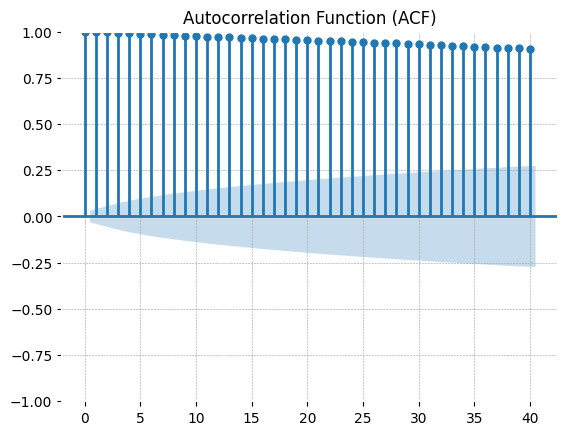

In [42]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_short_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

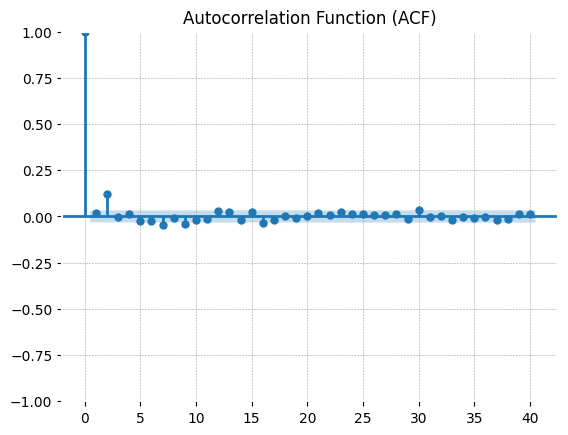

In [43]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_short_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# LSTM Model

In [ ]:
# get the Date out of the index
jnj_short_data.reset_index(inplace=True)

In [ ]:
jnj_short_data

,Datetime,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff
0,2024-12-30 14:42:00+00:00,143.856201,143.886398,143.729996,143.740005,16911,143.866241,0.217796,144.301833,143.430650,21.991772,0.105215,0.141686,0.151199
1,2024-12-30 14:44:00+00:00,143.682007,143.940002,143.639999,143.869995,20763,143.756644,0.088469,143.933581,143.579706,18.064203,-0.121089,0.140291,-0.174194
2,2024-12-30 14:46:00+00:00,143.699997,143.860001,143.650299,143.729996,14476,143.726642,0.072970,143.872582,143.580701,21.377098,0.012521,0.095133,0.017990
3,2024-12-30 14:48:00+00:00,143.639999,143.710007,143.539993,143.710007,24238,143.716641,0.082102,143.880845,143.552437,19.218889,-0.041752,0.082918,-0.059998
4,2024-12-30 14:50:00+00:00,143.399994,143.739899,143.399994,143.595001,26607,143.655640,0.164687,143.985013,143.326266,22.506246,-0.167088,0.107873,-0.240005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3692,2025-01-28 20:50:00+00:00,150.949997,150.960007,150.610001,150.750000,70440,150.800000,0.088599,150.977198,150.622802,77.192419,0.139307,0.074899,0.209991
3693,2025-01-28 20:52:00+00:00,151.070007,151.110001,150.919998,150.949997,110265,150.868002,0.138095,151.144192,150.591812,76.363535,0.079503,0.067860,0.120010
3694,2025-01-28 20:54:00+00:00,150.835007,151.089996,150.835007,151.080002,119732,150.879004,0.131358,151.141720,150.616288,52.287777,-0.155557,0.113374,-0.235001
3695,2025-01-28 20:56:00+00:00,150.664993,150.869995,150.660004,150.835007,143651,150.852002,0.161967,151.175937,150.528067,46.242724,-0.112715,0.125120,-0.170013


In [ ]:
# isolet the Date and Sales columns
jnj_short_data = jnj_short_data[['Datetime', 'Close_diff']]

In [ ]:
jnj_short_data

,Datetime,Close_diff
0,2024-12-30 14:42:00+00:00,0.151199
1,2024-12-30 14:44:00+00:00,-0.174194
2,2024-12-30 14:46:00+00:00,0.017990
3,2024-12-30 14:48:00+00:00,-0.059998
4,2024-12-30 14:50:00+00:00,-0.240005
...,...,...
3692,2025-01-28 20:50:00+00:00,0.209991
3693,2025-01-28 20:52:00+00:00,0.120010
3694,2025-01-28 20:54:00+00:00,-0.235001
3695,2025-01-28 20:56:00+00:00,-0.170013


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(jnj_short_data) * 0.8)  # 80% for training
train_data = jnj_short_data[:train_size]
test_data = jnj_short_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Datetime', inplace=True)
test_data.set_index('Datetime', inplace=True)

In [ ]:
train_data

,Close_diff
Datetime,
2024-12-30 14:42:00+00:00,0.151199
2024-12-30 14:44:00+00:00,-0.174194
2024-12-30 14:46:00+00:00,0.017990
2024-12-30 14:48:00+00:00,-0.059998
2024-12-30 14:50:00+00:00,-0.240005
...,...
2025-01-23 15:38:00+00:00,0.059998
2025-01-23 15:40:00+00:00,0.375000
2025-01-23 15:42:00+00:00,0.190002


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('2024-12-30 14:42:00+0000', tz='UTC'),
 Timestamp('2025-01-23 15:46:00+0000', tz='UTC'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2025-01-23 15:48:00+0000', tz='UTC'),
 Timestamp('2025-01-28 20:58:00+0000', tz='UTC'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.2031
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 6.8774e-04
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0011
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 6.8845e-04
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0018
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
21.511237144470215


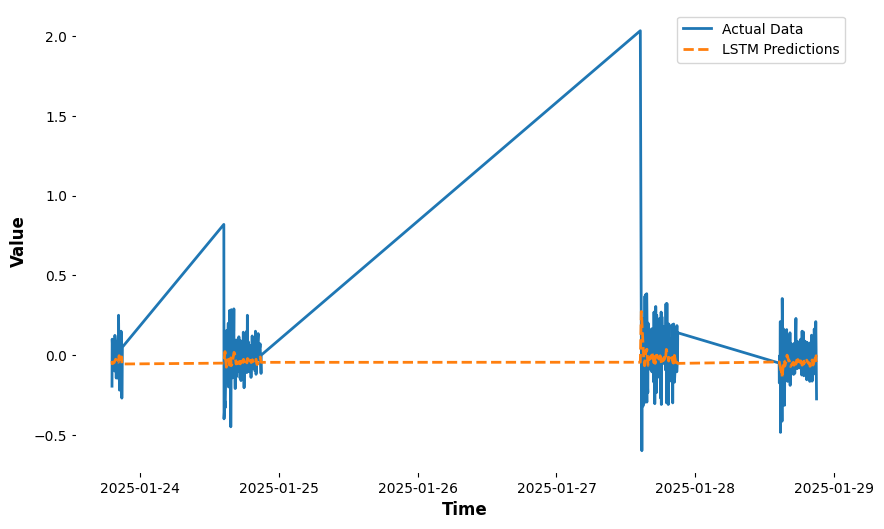

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

1854.4795465470909


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

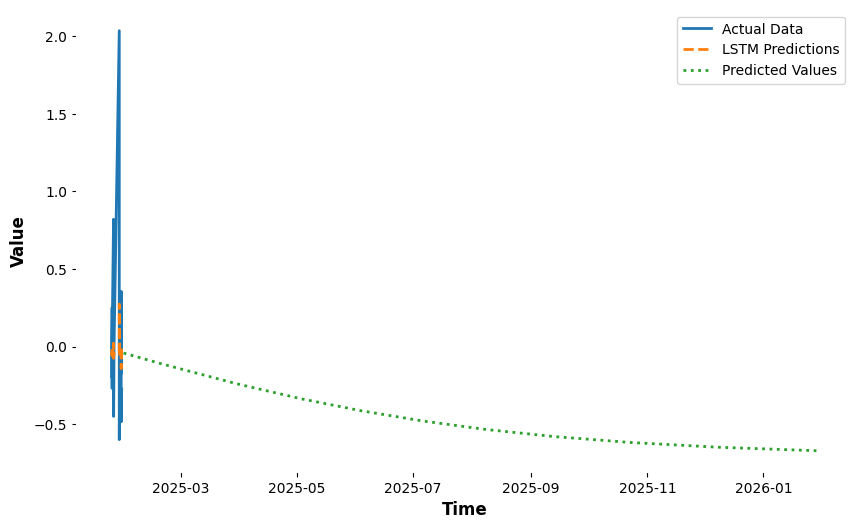

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()